## 线性回归中使用梯度下降法

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
np.random.seed(666)
x = 2 * np.random.random(size = 100)
y = x*3.0 + 4.4 + np.random.normal(size = 100)
x = x.reshape(-1, 1)

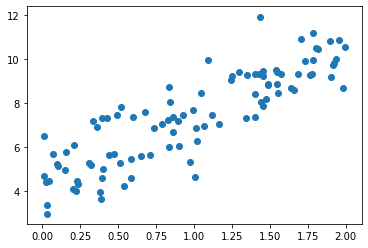

In [3]:
plt.figure()
plt.scatter(x, y)
plt.show()

## 梯度下降训练

![jupyter](./多元线性回归梯度下降公式.png)

In [4]:
def f(theta, x_b, y):
    try:
        return np.sum((y - x_b.dot(theta))**2)/len(x_b)
    except:
        return float('inf')

In [5]:
def df(theta, x_b, y):
    ret = np.empty(len(theta))
    ret[0] = np.sum(x_b.dot(theta) - y)
    
    for i in range(1, len(theta)):
        ret[i] = (x_b.dot(theta) - y).dot(x_b[:,i])
    
    return ret *2 /len(x_b)

## 梯形下降公式（向量操作）

![jupyter](./梯度下降法公式-向量操作.png)

In [6]:
def df1(theta, x_b, y):
    return x_b.T.dot(x_b.dot(theta) - y)*2/len(x_b)

In [7]:
def gradient_descent(x_b, y, init_theta, eta, iter_num = 1e4, f_zero = 1e-8):
    theta = init_theta
    iter_i = 0
    while iter_i < iter_num:
        gradient = df(theta, x_b, y)
        last_theta = theta
        theta = theta - gradient*eta
        
        if (np.abs(f(theta, x_b, y) - f(last_theta, x_b, y)) < f_zero):
            break
        iter_i += 1 
    return theta

In [8]:
x.shape[0]

100

In [9]:
x_b = np.hstack([np.ones(shape=(len(x), 1)), x])

In [10]:
x_b.shape

(100, 2)

In [11]:
init_theta = np.zeros(x_b.shape[1])
eta = 0.01

In [12]:
theta = gradient_descent(x_b, y, init_theta, eta)

In [13]:
theta

array([4.42145881, 3.00706197])

## 使用自己封装的 线性回归梯度下降法 

In [14]:
import sys
sys.path.append('C:/Users/admin/Desktop/ml')

In [15]:
from playML.LinearRegression import LinearRegression

In [16]:
linear_reg = LinearRegression()

In [17]:
linear_reg.fit_gd(x, y)

In [18]:
linear_reg.coef_

array([3.00706197])

In [19]:
linear_reg.interception_

array([4.42145881])

## 梯度下降法注意问题：  数据归一化

In [20]:
import numpy as np
from sklearn import datasets

In [21]:
boston = datasets.load_boston()
x = boston.data
y = boston.target

In [22]:
x = x[y < 50]
y = y[y < 50]

In [23]:
from playML.model_select import train_test_split

In [24]:
train_x, test_x, train_y, test_y = train_test_split(x, y, seed=666)

In [25]:
from playML.LinearRegression import LinearRegression

In [26]:
linear_reg1 = LinearRegression()

In [27]:
linear_reg.fit_normal(train_x, train_y)

In [28]:
linear_reg.score(test_x, test_y)

0.812979405621756

## 梯度下降法

In [29]:
linear_reg2 = LinearRegression()

In [30]:
linear_reg2.fit_gd(train_x, train_y)

e:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:/Users/admin/Desktop/ml\playML\LinearRegression.py:24: RuntimeWarning: overflow encountered in square
  return np.sum((y - x_b.dot(theta))**2) / len(y)
C:/Users/admin/Desktop/ml\playML\LinearRegression.py:46: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs(f(theta, x_b, y) - f(last_theta, x_b, y)) < epsilon :


In [31]:
linear_reg2.coef_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [32]:
train_x[:10, :]

array([[1.42362e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        6.34300e+00, 1.00000e+02, 1.57410e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 2.03200e+01],
       [3.67822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.70000e-01,
        5.36200e+00, 9.62000e+01, 2.10360e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.80790e+02, 1.01900e+01],
       [1.04690e-01, 4.00000e+01, 6.41000e+00, 1.00000e+00, 4.47000e-01,
        7.26700e+00, 4.90000e+01, 4.78720e+00, 4.00000e+00, 2.54000e+02,
        1.76000e+01, 3.89250e+02, 6.05000e+00],
       [1.15172e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        5.70100e+00, 9.50000e+01, 3.78720e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.58770e+02, 1.83500e+01],
       [6.58800e-02, 0.00000e+00, 2.46000e+00, 0.00000e+00, 4.88000e-01,
        7.76500e+00, 8.33000e+01, 2.74100e+00, 3.00000e+00, 1.93000e+02,
        1.78000e+01, 3.95560e+02, 7.56000e+00],
       [2.49800e-02, 0.00000e+

In [35]:
linear_reg2.fit_gd(train_x, train_y, eta = 0.000001)

In [36]:
linear_reg2.coef_

array([-0.10245704,  0.11535876, -0.06248791,  0.00207516,  0.00447152,
        0.11954208,  0.04684195,  0.03460927, -0.00452122,  0.00324507,
        0.1271939 ,  0.04484862, -0.22542441])

In [37]:
linear_reg2.score(test_x, test_y)

0.27586818724477236

In [38]:
%time linear_reg2.fit_gd(train_x, train_y, eta = 0.000001, max_iter=1e6)

Wall time: 1min 4s


In [45]:
linear_reg2.score(test_x, test_y)

0.7542932581943915

## 数据归一化

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
standard_scaler = StandardScaler()

In [42]:
standard_scaler.fit(train_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
train_x_std = standard_scaler.transform(train_x)

In [46]:
linear_reg3 = LinearRegression()

In [47]:
linear_reg3.fit_gd(train_x_std, train_y)

In [48]:
test_x_std = standard_scaler.transform(test_x)

In [49]:
linear_reg3.score(test_x_std, test_y)

0.8129873310487505

## 梯度下降法优势（效率）

In [50]:
m = 1000  #样本数
n = 5000  #特征数

In [51]:
big_x = np.random.normal(size = (m, n))
theta_val = np.random.uniform(0.0, 100.0, size = n + 1)
big_y = big_x.dot(theta_val[1:]) + theta_val[0] + np.random.normal(0.0, 10.0, size = m)

In [52]:
big_reg = LinearRegression()

In [53]:
%time big_reg.fit_normal(big_x, big_y)

Wall time: 1min 4s


In [54]:
big_reg1 = LinearRegression()

In [56]:
%time big_reg1.fit_gd(big_x, big_y)

Wall time: 3.44 s
